#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#library untuk analisa time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Library forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
#library google drive
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
file_dir = "/content/drive/MyDrive/Colab Notebooks/homework digital skola/Final Project"
os.chdir(file_dir)

In [ ]:
!ls

 archive.zip  'CO2 dataset.xlsx'   Final_Project_-_Data_Science_Batch_27.pdf


#Load Dataset

In [ ]:
# Load dataset
df = pd.read_excel('CO2 dataset.xlsx')

# Check the shape of the dataset
print(df.shape)

(215, 2)


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [ ]:
# Check the data types of the columns
print(df.dtypes)

Year      int64
CO2     float64
dtype: object


In [ ]:
# Check the summary statistics of the numerical columns
print(df.describe())

              Year         CO2
count   215.000000  215.000000
mean   1907.000000    6.741970
std      62.209324    6.522437
min    1800.000000    0.001750
25%    1853.500000    0.041050
50%    1907.000000    6.390000
75%    1960.500000   11.500000
max    2014.000000   18.200000


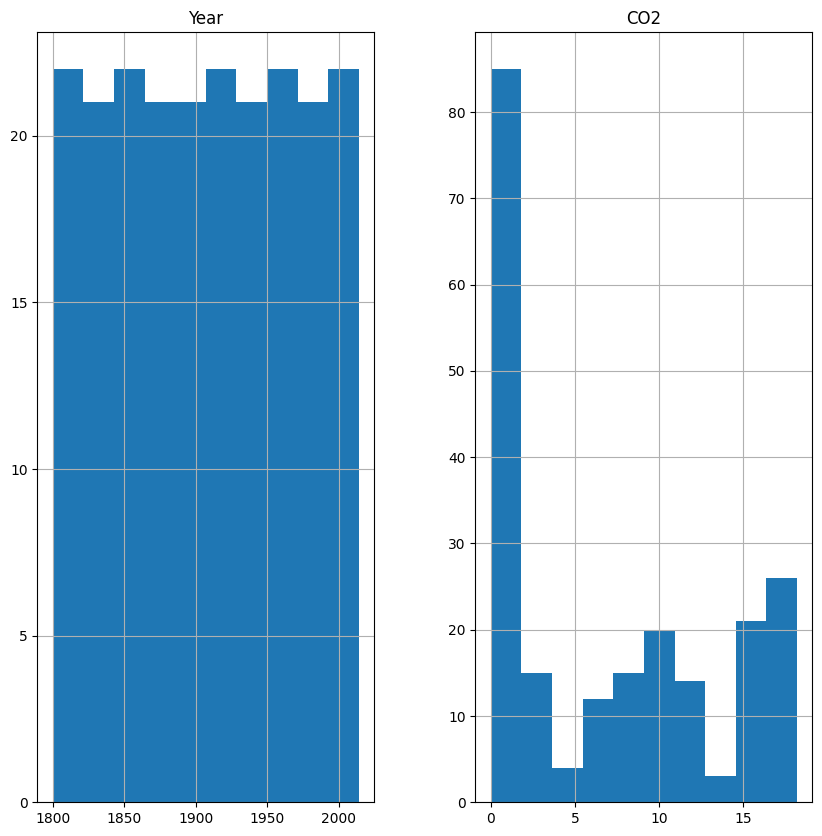

In [ ]:
# Check the distribution of the numerical columns
df.hist(figsize=(10, 10))
plt.show()

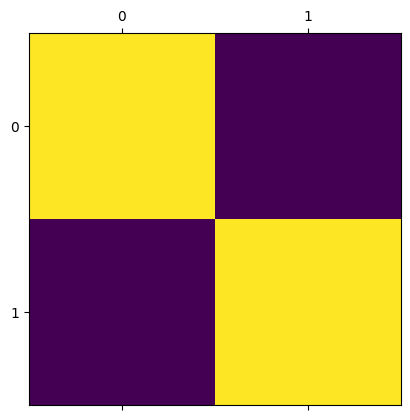

In [ ]:
# Check the correlation between the numerical columns
plt.matshow(df.corr())
plt.show()

In [ ]:
# Check the missing values in the dataset
print(df.isna().sum())

Year    0
CO2     0
dtype: int64


In [ ]:
# Check the shape of the dataset after dropping the missing values
print(df.shape)

(215, 2)


#Transform Data

In [ ]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [ ]:
df.set_index(['Year'], inplace=True)

In [ ]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [ ]:
df.index.min(), df.index.max()

(Timestamp('1800-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'))

In [ ]:
# checking if data is continues
if (df.index.max() - df.index.min() == 214):
    print('Data Is Continuous')

In [ ]:
df.index.freq='YS' # setting the data frequency to year

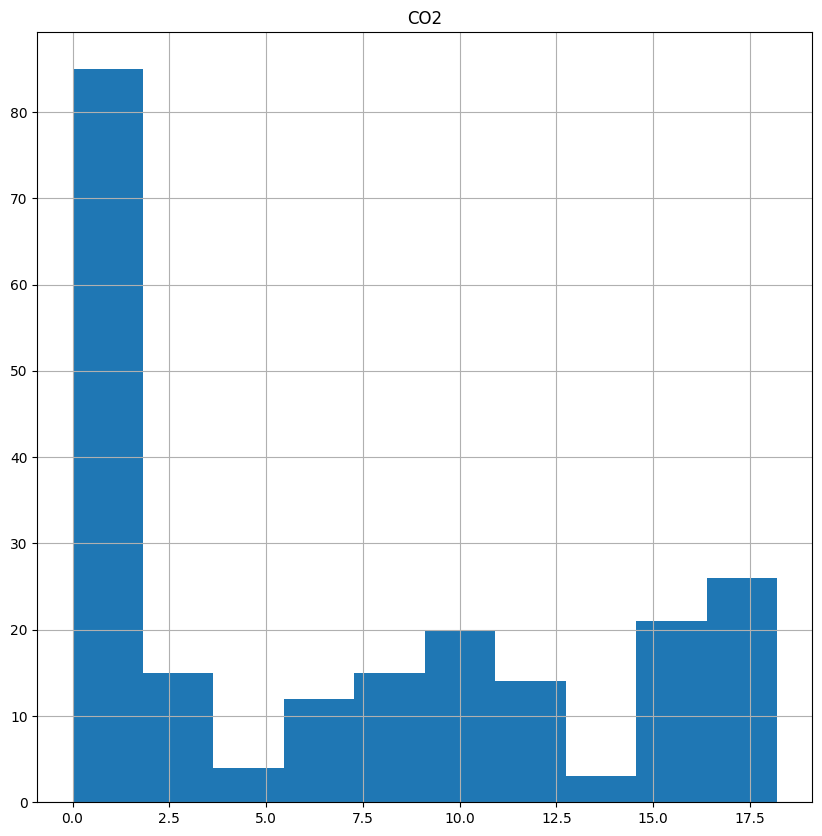

In [ ]:
df.hist(figsize=(10, 10))
plt.show()

#Analisa Time Series

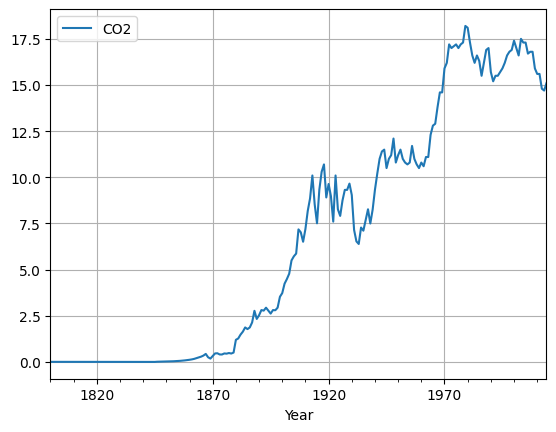

In [ ]:
df.plot(grid=True);

In [ ]:
train_df = df.loc[:'1991-01-01']
test_df = df.loc['1992-01-01':]

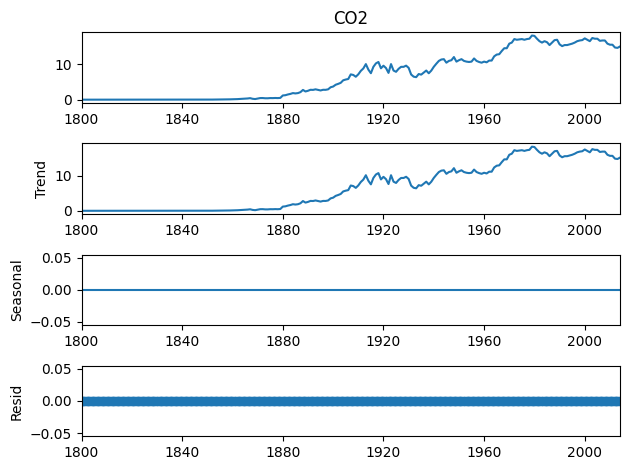

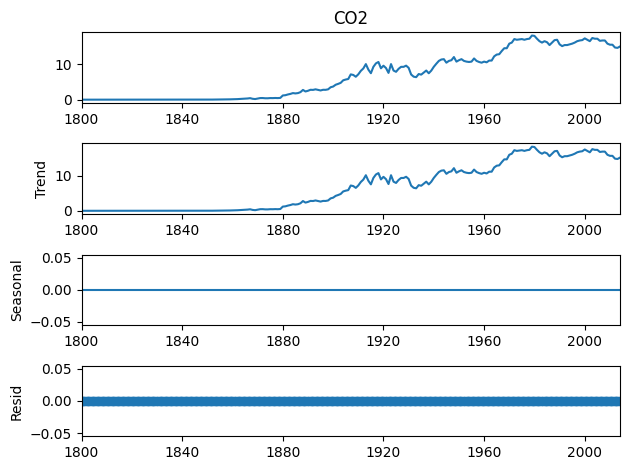

In [ ]:
decompose_add = seasonal_decompose(df['CO2'])
decompose_add.plot()

In [ ]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller:')
    print ('----------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print (adf_output)

# calling adf function and passing series
adf_test(df.values)

Results of Dickey-Fuller:
----------------------------------------------
Test Statistic                  -0.378463
p-value                          0.913633
#Lags Used                       0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


In [ ]:
diff_df = df.diff()
diff_df.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006


In [ ]:
diff_df.dropna(inplace=True)

<Axes: xlabel='Year'>

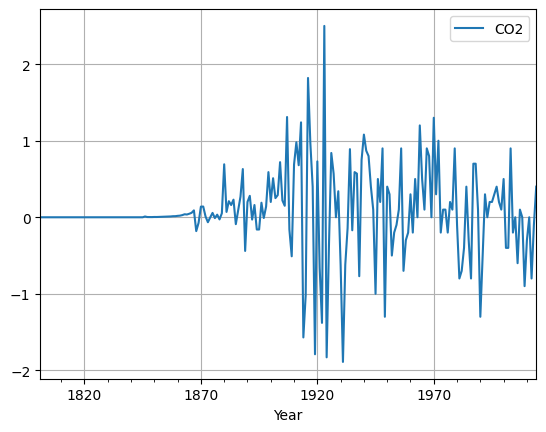

In [ ]:
diff_df.plot(grid=True)
#Hasil sudah cukuo stationer

In [ ]:
adf_test(diff_df)

Results of Dickey-Fuller:
----------------------------------------------
Test Statistic                  -3.780005
p-value                          0.003119
#Lags Used                      15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


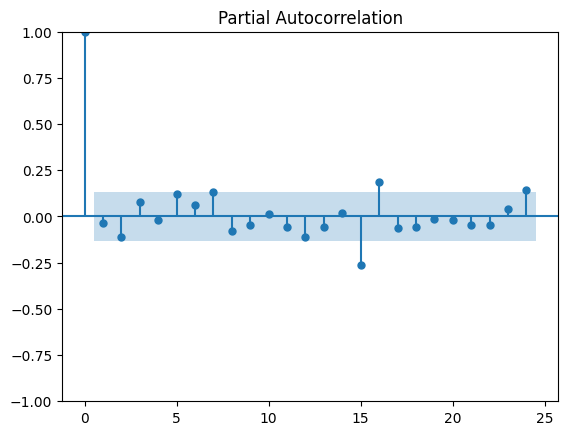

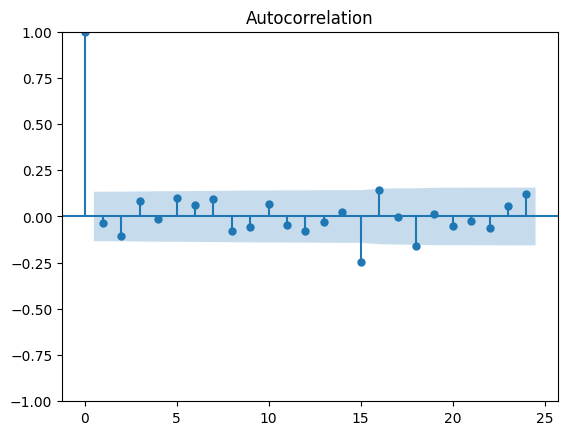

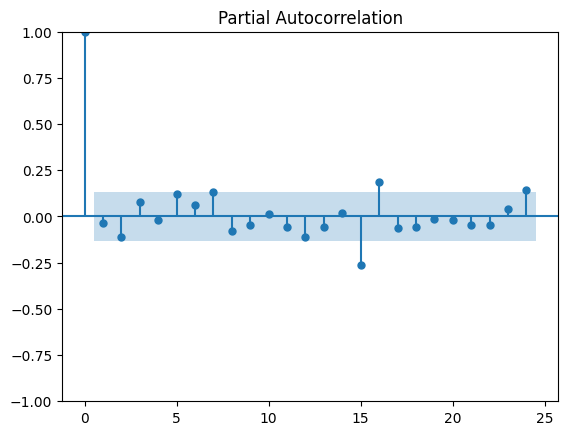

In [ ]:
plot_acf(diff_df)
plot_pacf(diff_df)

#Single Exponential Smoothing

In [ ]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(23)

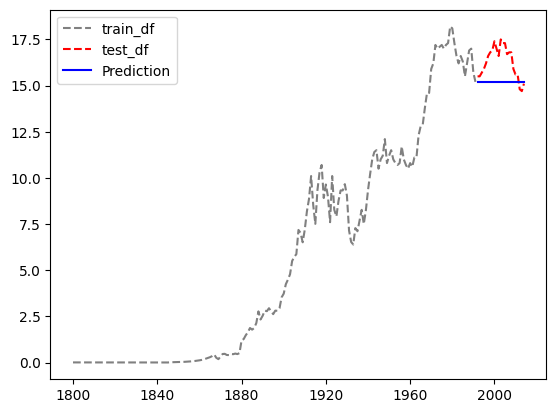

In [ ]:
# Plot train_df['CO2']
plt.plot(train_df['CO2'], linestyle='--', color='gray', label='train_df')

# Plot test_df['CO2']
plt.plot(test_df['CO2'], linestyle='--', color='r', label='test_df')

# Plot single_exp_test_pred
plt.plot(single_exp_test_pred, color='b', label='Prediction')

# Tambahkan legenda dan tampilkan plot
plt.legend()
plt.show()


In [ ]:
type(test_df['CO2'])

pandas.core.series.Series

#Tampilkan Test Train RMSE dll

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE: 0.5646920026800116
Test RMSE: 1.342911302270165
Train MAPE: 0.08470530767414804
Test MAPE: 0.06861466412077383


Hasil Single exponential masih cukup jauh dai hasil data testing dan data prediksi

#Double Exponential Smoothing

In [ ]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(23)

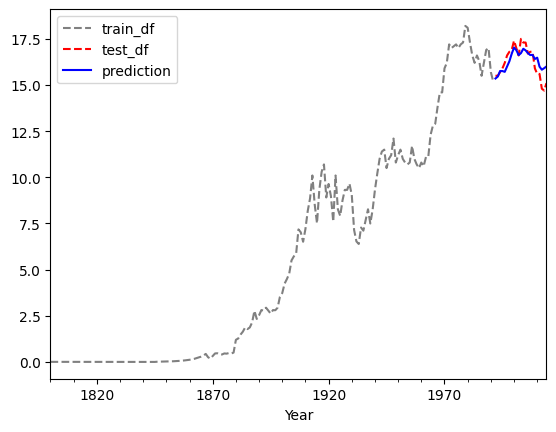

In [ ]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE: 0.5219963052653047
Test RMSE: 0.5352720574221986
Train MAPE: 12.80676949834386
Test MAPE: 0.026063825837478335


#ARIMA

In [ ]:
ar = ARIMA(train_df, order=(15,1,15)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(23)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


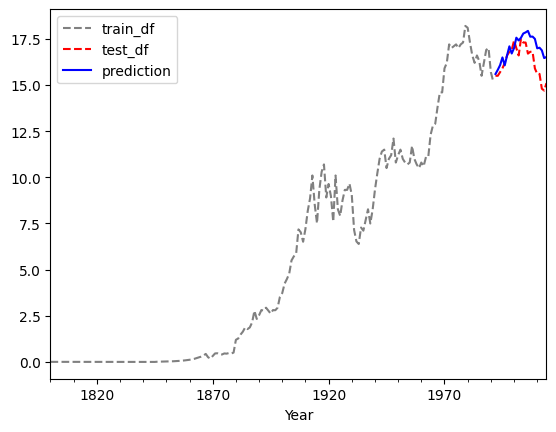

In [ ]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
print('Train RMSE:',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE:',mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE: 0.4678524899028528
Test RMSE: 0.9605096043151236
Train MAPE: 0.08144928925922511
Test MAPE: 0.04786259357704302


#Perbandingan Algoritma

In [ ]:
comparison_df = pd.DataFrame(data=[
    ['Single Exponential Smoothing',1.3429,0.0686],
    ['Double Exponential Smoothing',0.5352,0.0260],
    ['ARIMA',0.9605,0.0478]
    ],
    columns=['Model','RMSE','MAPE'])
comparison_df.set_index('Model',inplace=True)

In [ ]:
comparison_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
Double Exponential Smoothing,0.5352,0.0260
ARIMA,0.9605,0.0478
Single Exponential Smoothing,1.3429,0.0686


dari hasil komparasi di atas untuk perbandingan model kita ambil double exponential smoothing

In [174]:
double_exp = ExponentialSmoothing(df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_pred = double_exp.forecast(20)

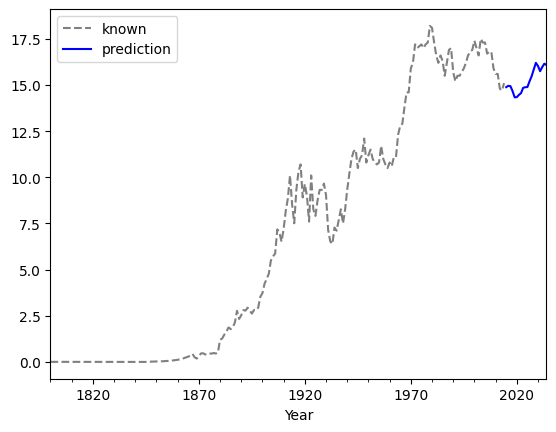

In [175]:
df['CO2'].plot(style='--', color='gray', legend=True, label='known')
double_exp_pred.plot(color='b', legend=True, label='prediction')
plt.show()

#Simpan Model

In [ ]:
import pickle

In [ ]:
pickle.dump(double_exp, open('prediksi_co2.sav','wb'))